# WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import scipy.stats as st
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# Need to install pip install citipy for this to work
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_longs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls

In [11]:
#Base URL to initiate API call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Set record and city group counters
city_group_counter = 0
record_counter = 0

#Set empty lists
lats = []
longs = []
temperatures = []
humidities = []
cloudiness = []
wind_speeds = []
cities_api = []
countries = []

print("-----------------------------")
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Make a request to the API for each city in the cities list
for city in cities:
    cityquery_url = base_url + "&q=" + city
    
    # Gets the response of to the request and stores it as json
    response = requests.get(cityquery_url).json()
  
    # Groups the results by 60
    if record_counter < 60:
        record_counter += 1
    else:
        city_group_counter += 1
        record_counter = 0

    print(f"Processing Record {record_counter} of Set {city_group_counter} | {city}")
    
    # Appends results to the emplty list
    try:
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        temperatures.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        #dates.append(response['dt'])
        cities_api.append(city)
    
    # Skips city if not found in the cities list and moves on to the next
    except:
        print("City not found. Skipping...")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

-----------------------------
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 0 | vaini
Processing Record 2 of Set 0 | chaa-khol
City not found. Skipping...
Processing Record 3 of Set 0 | esperance
Processing Record 4 of Set 0 | punta arenas
Processing Record 5 of Set 0 | saskylakh
Processing Record 6 of Set 0 | makaryev
Processing Record 7 of Set 0 | opuwo
Processing Record 8 of Set 0 | artyk
City not found. Skipping...
Processing Record 9 of Set 0 | bredasdorp
Processing Record 10 of Set 0 | hobart
Processing Record 11 of Set 0 | bako
Processing Record 12 of Set 0 | ejido
Processing Record 13 of Set 0 | mataura
Processing Record 14 of Set 0 | buraydah
Processing Record 15 of Set 0 | santa marta
Processing Record 16 of Set 0 | lebu
Processing Record 17 of Set 0 | lipin bor
Processing Record 18 of Set 0 | inirida
Processing Record 19 of Set 0 | yukhnov
Processing Record 20 of Set 0 | ust-tsilma
Processing Record 21 of Set 0 | carnarvon
Processing 

In [12]:
response

{'coord': {'lon': 105.5126, 'lat': 32.1371},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 45,
  'feels_like': 37.13,
  'temp_min': 45,
  'temp_max': 45,
  'pressure': 852,
  'humidity': 45},
 'visibility': 10000,
 'wind': {'speed': 5.99, 'deg': 0, 'gust': 14},
 'clouds': {'all': 99},
 'dt': 1613367474,
 'sys': {'type': 3,
  'id': 2031351,
  'country': 'CN',
  'sunrise': 1613346044,
  'sunset': 1613385822},
 'timezone': 28800,
 'id': 1798537,
 'name': 'Hanyang',
 'cod': 200}

In [13]:
# Create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_data = {
    "Country" : countries,
    "City": cities_api,
    "Latitude (Degrees)" : lats,
    "Longitude (Degrees)" : longs,
    "Temperature (F)": temperatures,
    "Humidity (%)" : humidities,
    "Cloudiness (%)" : cloudiness,
    "Wind Speed (mph)" : wind_speeds
}
weather_df = pd.DataFrame(weather_data)
weather_df.count()


Country                557
City                   557
Latitude (Degrees)     557
Longitude (Degrees)    557
Temperature (F)        557
Humidity (%)           557
Cloudiness (%)         557
Wind Speed (mph)       557
dtype: int64

In [14]:
weather_df

,Country,City,Latitude (Degrees),Longitude (Degrees),Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,TO,vaini,-21.2000,-175.2000,84.20,79,75,4.61
1,AU,esperance,-33.8667,121.9000,91.40,21,16,11.50
2,CL,punta arenas,-53.1500,-70.9167,50.00,66,90,20.71
3,RU,saskylakh,71.9167,114.0833,-20.72,85,100,14.14
4,RU,makaryev,57.8797,43.8069,-7.22,90,85,9.01
...,...,...,...,...,...,...,...,...
552,IN,mangrol,21.1167,70.1167,75.36,58,0,4.59
553,MZ,maxixe,-23.8597,35.3472,77.00,100,75,10.40
554,CI,tabou,4.4230,-7.3528,77.97,90,38,6.33
555,PE,barranca,-10.7500,-77.7667,69.64,83,0,3.98


In [15]:
#Creates a csv file of WEATHER data in the output folder
weather_df.to_csv("Output/weather_data_output.csv", encoding="utf-8", index=False)

In [16]:
#Checks if any city has humidity > 100% by looking at max
weather_df["Humidity (%)"].describe()

count    557.000000
mean      74.696589
std       18.477564
min       14.000000
25%       67.000000
50%       78.000000
75%       88.000000
max      100.000000
Name: Humidity (%), dtype: float64

## Plotting the Data

## Latitude vs. Temperature Plot

In [17]:
# Stores the values for latitudes and temperature needed for plotting
citylats_array= weather_df["Latitude (Degrees)"].values
citytemps_array = weather_df["Temperature (F)"].values

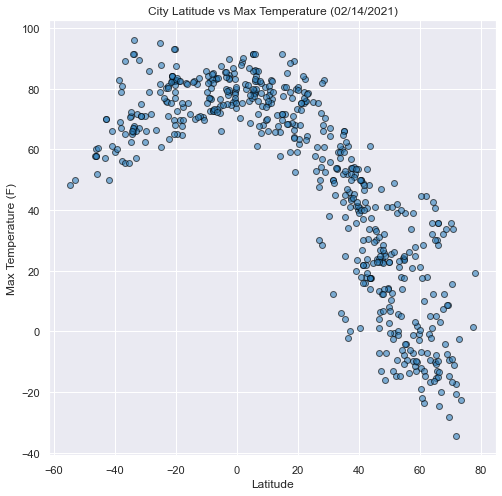

In [28]:
# Sets figure size and seaborn for better visuals
plt.figure(figsize=(8,8))

#Plots graphs with labels
plt.scatter(citylats_array, citytemps_array, color='#3182bd', edgecolors='#000', alpha=0.60)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({time.strftime("%m/%d/%Y")})')

#Saves the figure as png
plt.savefig("Output/citylats_temp.png")
plt.show()

#### Analysis: This figure shows the relationship between latitude and temperature. The temperature gets hotter as it gets closer to the equator and the temperature drops as it gets farther.

## Latitude vs. Humidity Plot

In [26]:
# Stores the values of humidity needed for plotting
cityhumid_array = weather_df["Humidity (%)"].values

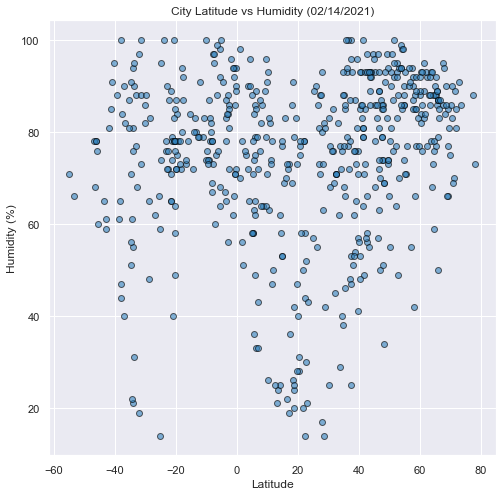

In [27]:
# Sets figure size and seaborn for better visuals
plt.figure(figsize=(8,8))

# Plots graph
plt.scatter(citylats_array, cityhumid_array, color='#3182bd', edgecolors='#000', alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({time.strftime("%m/%d/%Y")})')

#Saves figure as png
plt.savefig("Output/lats_humidity.png")
plt.show()

#### Analysis: This figure shows that there is no strong relationship between latitude and humidity. However, Northern Hemisphere shows higher percentage of humidity levels compared to the Southern Hemeisphere. Most cities are located in the Northern Hemisphere and are surrounded by lakes, rivers and beaches that help increase the supply of water consumed by people. Therefore, increases the amount of water vapor in the atmosphere.

## Latitude vs. Cloudiness Plot

In [30]:
# Stores the values of cloudiness needed for plotting
citycloud_array = weather_df["Cloudiness (%)"].values

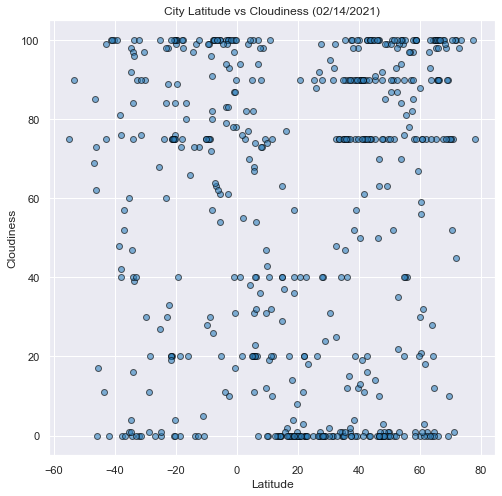

In [31]:
#Sets figure size
plt.figure(figsize=(8,8))

# Plots graph
plt.scatter(citylats_array, citycloud_array, color='#3182bd', edgecolors='#000', alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs Cloudiness ({time.strftime("%m/%d/%Y")})')

# Saves figure as png
plt.savefig("Output/lats_cloudiness.png")
plt.show()

#### Analysis: This figure shows that there is no relationship between latitude and cloudiness. However, cloudiness looks more apparent in the Northern Hemisphere where the city population is more dense than in the Southern Hemisphere. 

## Latitude vs. Wind Speed Plot

In [32]:
# Stores the values of wind speed needed for plotting
citywind_array = weather_df["Wind Speed (mph)"].values

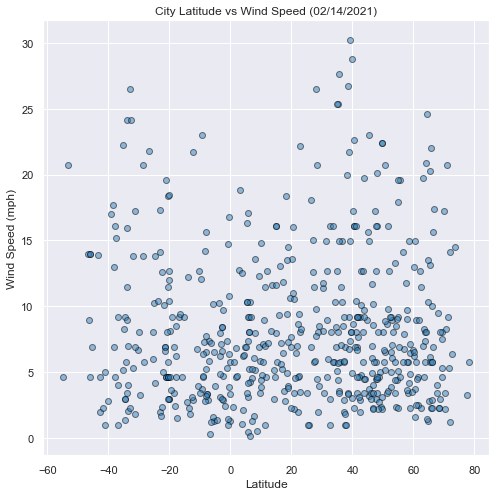

In [33]:
# Sets figure size
plt.figure(figsize=(8,8))

#Plots graph and labels
plt.scatter(citylats_array, citywind_array, color='#3182bd', edgecolors='#000', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({time.strftime("%m/%d/%Y")})')

# Saves figure as png
plt.savefig("Output/lats_wind.png")
plt.show()

#### Analysis: This figure shows that there is no relationship between wind speed and latitude. Most cities seem to have less than 10 mph wind speed and a big cluster of these cities are in the Northern Hemisphere.

## Linear Regression

In [34]:
# Define a function for linear regression
def hemisphr_linreg(xvalues, yvalues, x_label, y_label, title, x_ann, y_ann, color):
    
    # Performs linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)   

    # Get x/y values for linear regression 
    regress_values = xvalues * slope + intercept                                        
    regress_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xvalues, yvalues)

     # Adds linear regression line to scatter plot
    plt.plot(xvalues,regress_values,"r-")                                              
    plt.annotate(regress_line,(x_ann, y_ann),fontsize=15,color="red")

    #Add titles and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    print(f"The r-squared is: {rvalue**2}")
    
    plt.show()

#### Nothern & Southern Hemisphere Filters

In [35]:
# Filters dataframe to look at Northern Hemisphere only & get the array values of the latitudes
north_hem_df = weather_df.loc[weather_df['Latitude (Degrees)']>=0]
north_xaxis = north_hem_df['Latitude (Degrees)'].values

# Filters dataframe to look at Southern Hemisphere only & get the array values of the latitudes
south_hem_df = weather_df.loc[weather_df['Latitude (Degrees)']<0]
south_xaxis = south_hem_df['Latitude (Degrees)'].values

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7523587474776873


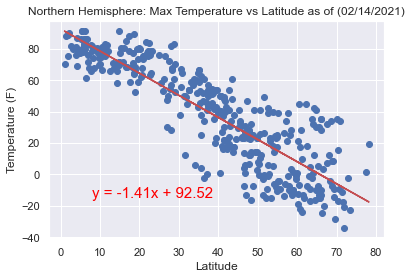

In [36]:
# Set temperature array values as y-axis for north hemisphere
north_yaxis = north_hem_df['Temperature (F)'].values
north_title = f'Northern Hemisphere: Max Temperature vs Latitude as of ({time.strftime("%m/%d/%Y")})'

# Call linear regression function to plot graph
hemisphr_linreg(north_xaxis, north_yaxis, 'Latitude','Temperature (F)', north_title, 8, -15, '#3182bd')

#### Analysis: This figure predicts the temperature at given latitude in the Northern Hemisphere. There is a strong inverse correlation between temperature and latitude. As the latitude increases moving away from the equator, the temperature decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.29250542165454985


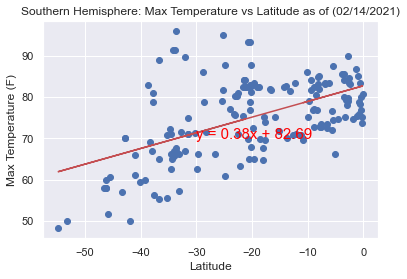

In [38]:
# Set temperature array values as y-axis for south hemisphere
south_yaxis = south_hem_df['Temperature (F)'].values
south_title = f'Southern Hemisphere: Max Temperature vs Latitude as of ({time.strftime("%m/%d/%Y")})'

# Call linear regression function to plot graph 
hemisphr_linreg(south_xaxis, south_yaxis, 'Latitude','Max Temperature (F)', south_title, -30, 70, '#3182bd')

#### Analysis: This figure predicts temperature at given latitudes in the Southern Hemisphere. Temperature and latitudes have a weak positive correlation. As the latitude heads down further South, temperature drops. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15043354320374788


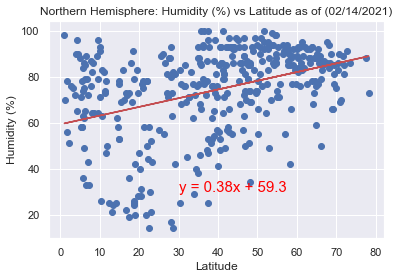

In [39]:
# Set humidity array values as y-axis for north hemisphere
nhumid_yaxis = north_hem_df['Humidity (%)'].values
nhumid_title = f'Northern Hemisphere: Humidity (%) vs Latitude as of ({time.strftime("%m/%d/%Y")})'

# Call linear regression function to plot graph 
hemisphr_linreg(north_xaxis, nhumid_yaxis, 'Latitude','Humidity (%)', nhumid_title, 30, 30, '#3182bd')

#### Analysis: This figure predicts humidity at given latitudes in the Northern Hemisphere. Humidity and latitude position have a very weak positive correlation. Therefore, this regression model is not the best fit to accurately predict humidity levels at given latitude positions.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06414805591469147


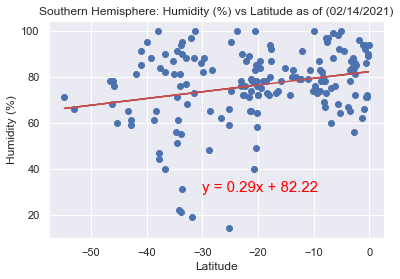

In [40]:
# Set humidity array values as y-axis for south hemisphere
shumid_yaxis = south_hem_df['Humidity (%)'].values
shumid_title = f'Southern Hemisphere: Humidity (%) vs Latitude as of ({time.strftime("%m/%d/%Y")})'

# Call linear regression function to plot graph 
hemisphr_linreg(south_xaxis, shumid_yaxis, 'Latitude','Humidity (%)', shumid_title, -30, 30, '#3182bd')

#### Analysis:There is very weak relationship between humidity levels and latitude locations in the Southern Hemisphere. The regression model will not be a good representation to predict humidity levels at given latitude locations.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.073830775187267


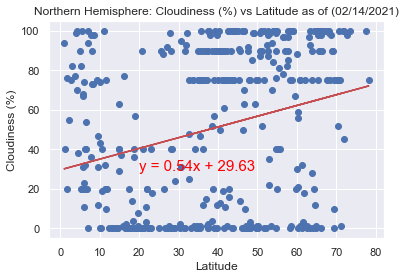

In [41]:
# Set cloudiness array values as y-axis for north hemisphere
ncloud_yaxis = north_hem_df['Cloudiness (%)'].values
ncloud_title = f'Northern Hemisphere: Cloudiness (%) vs Latitude as of ({time.strftime("%m/%d/%Y")})'

# Call linear regression function to plot graph 
hemisphr_linreg(north_xaxis, ncloud_yaxis, 'Latitude','Cloudiness (%)', ncloud_title, 20, 29, '#3182bd')

#### Analysis: There is very weak relationship between cloudy atmosphere and latitude position in the Northern Hemisphere. Regression model is not a good representation of measuring the cloudiness in given latiude locations.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04793188910674921


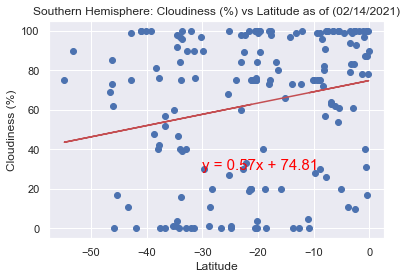

In [42]:
# Set cloudiness array values as y-axis for south hemisphere
scloud_yaxis = south_hem_df['Cloudiness (%)'].values
scloud_title = f'Southern Hemisphere: Cloudiness (%) vs Latitude as of ({time.strftime("%m/%d/%Y")})'

# Call linear regression function to plot graph
hemisphr_linreg(south_xaxis, scloud_yaxis, 'Latitude','Cloudiness (%)', scloud_title, -30, 30, '#3182bd')

#### Analysis: There's very weak positive relationship between cloudy atmosphere and latitude positions in the Southern Hemisphere. Regression model might not be able to predict cloudiness in given latitude locations accurately.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0008659259567780695


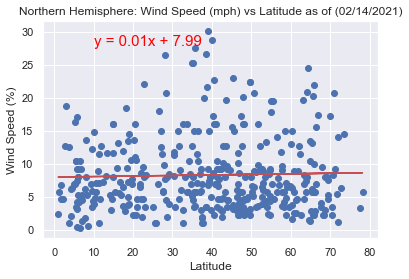

In [48]:
# Set wind speed array values as y-axis for north hemisphere
nwind_yaxis = north_hem_df['Wind Speed (mph)'].values
nwind_title = f'Northern Hemisphere: Wind Speed (mph) vs Latitude as of ({time.strftime("%m/%d/%Y")})'

# Call linear regression function to plot graph
hemisphr_linreg(north_xaxis, nwind_yaxis, 'Latitude','Wind Speed (%)', nwind_title, 10, 28, '#3182bd')

#### Analysis: There is no relationship between latitude positions and wind speeds in the Northern Hemisphere. This regression model is not a good represention to predict wind speeds in differnt latitudes.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.053261960433726496


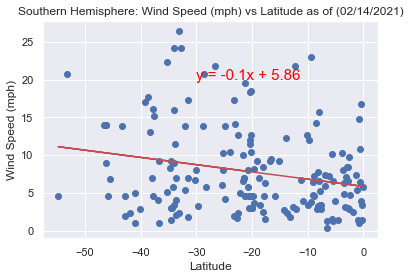

In [49]:
# Set wind speed array values as y-axis for south hemisphere
swind_yaxis = south_hem_df['Wind Speed (mph)'].values
swind_title = f'Southern Hemisphere: Wind Speed (mph) vs Latitude as of ({time.strftime("%m/%d/%Y")})'

# Call linear regression function to plot graph
hemisphr_linreg(south_xaxis, swind_yaxis, 'Latitude','Wind Speed (mph)', swind_title, -30, 20, '#3182bd')

#### Analysis: There is a very weak inverse realtionship between wind speed and latitude positions in the Southern Hemisphere. Therefore, this regression model is not a good represention to predict wind speeds in differnt latitudes. 